## Loading necessary libraries

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import Sequential
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

## Loading the dataset and Train - Test - Split

In [2]:
(xtrain,ytrain),(xtest,ytest) = cifar10.load_data()

## Scaling and Normalization

In [3]:
xtrain = xtrain.astype("float32") / 255.0
xtest = xtest.astype("float32") / 255.0

ytrain = to_categorical(ytrain,10)
ytest = to_categorical(ytest,10)

## Building the model

In [4]:

model = tf.keras.Sequential([
 #First Block
 tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
 tf.keras.layers.BatchNormalization(),
 tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
 tf.keras.layers.BatchNormalization(),
 tf.keras.layers.MaxPooling2D((2, 2)),
 tf.keras.layers.Dropout(0.25),

 #Second Block
 tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
 tf.keras.layers.BatchNormalization(),
 tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
 tf.keras.layers.BatchNormalization(),
 tf.keras.layers.MaxPooling2D((2, 2)),
 tf.keras.layers.Dropout(0.25),

 #Third Block
 tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
 tf.keras.layers.BatchNormalization(),
 tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
 tf.keras.layers.BatchNormalization(),
 tf.keras.layers.MaxPooling2D((2, 2)),
 tf.keras.layers.Dropout(0.25),

 tf.keras.layers.Flatten(),
 tf.keras.layers.Dense(512, activation='relu'),
 tf.keras.layers.BatchNormalization(),
 tf.keras.layers.Dropout(0.5),
 tf.keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [6]:
early = EarlyStopping(monitor='val_loss', patience=3,restore_best_weights=True)

In [7]:
hist = model.fit(
    xtrain,
    ytrain,
    epochs=20,
    batch_size=64,
    validation_data=(xtest,ytest),
    callbacks=[early]
)

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 21ms/step - accuracy: 0.3845 - loss: 1.9890 - val_accuracy: 0.5540 - val_loss: 1.2476
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.6303 - loss: 1.0462 - val_accuracy: 0.7026 - val_loss: 0.8847
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.7111 - loss: 0.8311 - val_accuracy: 0.7499 - val_loss: 0.7194
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.7470 - loss: 0.7320 - val_accuracy: 0.7330 - val_loss: 0.7925
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.7715 - loss: 0.6510 - val_accuracy: 0.7622 - val_loss: 0.7291
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.7861 - loss: 0.6064 - val_accuracy: 0.7739 - val_loss: 0.6568
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.8083 - loss: 0.5541 - val_accuracy: 0.8127 - val_loss: 0.5654
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8237 - loss: 0.5038 - val_

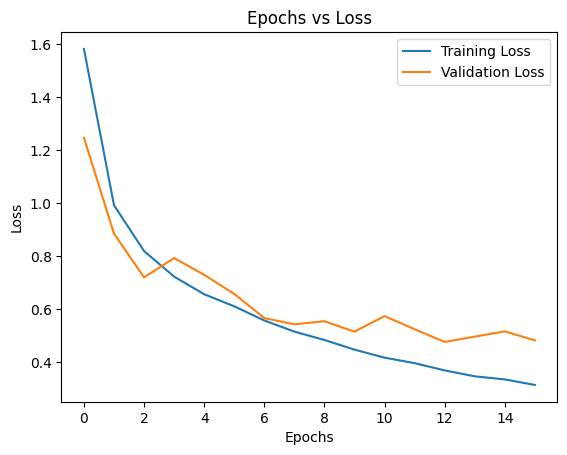

In [8]:
plt.plot(hist.history["loss"],label="Training Loss")
plt.plot(hist.history["val_loss"],label="Validation Loss")
plt.title("Epochs vs Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

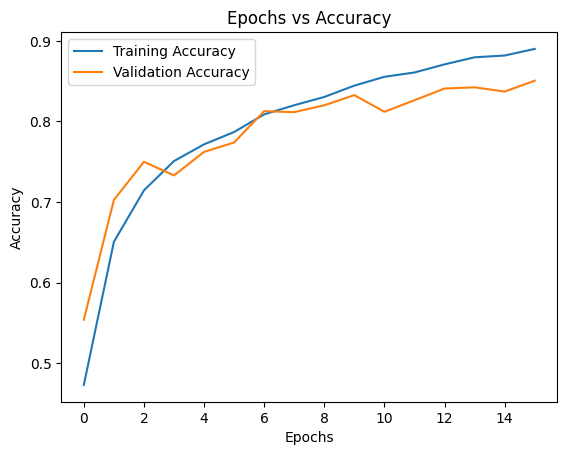

In [9]:
plt.plot(hist.history["accuracy"],label="Training Accuracy")
plt.plot(hist.history["val_accuracy"],label="Validation Accuracy")
plt.title("Epochs vs Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()